# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
import matplotlib.pyplot as plt

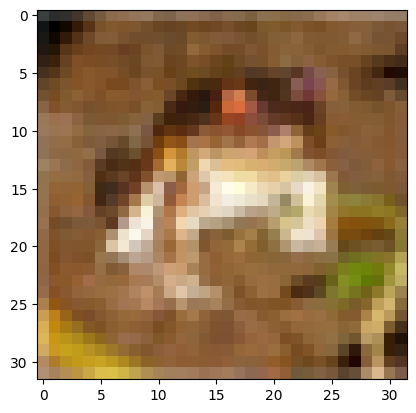

In [5]:
# FROG
plt.imshow(x_train[0])

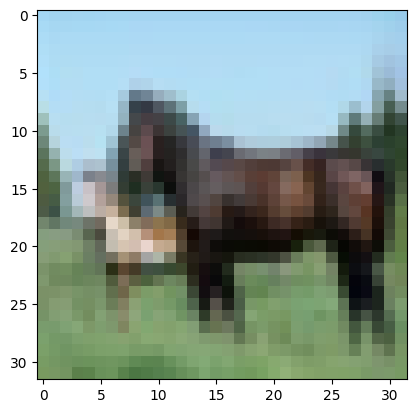

In [6]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
x_train.max()

255

In [10]:
x_train = x_train/225

In [11]:
x_test = x_test/255

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [14]:
from keras.utils import to_categorical

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [20]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3703 - loss: 1.7366
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5859 - loss: 1.1770
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6540 - loss: 0.9913
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6963 - loss: 0.8754
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7319 - loss: 0.7819
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7549 - loss: 0.7123
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7771 - loss: 0.6573
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7924 - loss: 0.6139
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8043 - loss: 0.5847
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8127 - loss: 0.5518


In [26]:
# Careful, don't overwrite our file!
model.save('cifar_10epochs.h5')

In [27]:
model.metrics_names

['loss', 'compile_metrics']

In [28]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6895 - loss: 1.0255


[1.0330344438552856, 0.6895999908447266]

In [30]:
from sklearn.metrics import classification_report

predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [41]:
import numpy as np 

binary_predictions = (predictions > 0.5).astype(int)
#binary_predictions
y_train_reversed = np.argmax(binary_predictions, axis=1)
y_train_reversed.reshape(1,-1)
y_train_reversed
#print(classification_report(y_test,predictions))

array([3, 1, 0, ..., 5, 1, 7], dtype=int64)

In [42]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [43]:
print(classification_report(y_test,y_train_reversed))

              precision    recall  f1-score   support

           0       0.34      0.80      0.48      1000
           1       0.84      0.78      0.81      1000
           2       0.75      0.46      0.57      1000
           3       0.52      0.47      0.49      1000
           4       0.70      0.61      0.65      1000
           5       0.73      0.42      0.53      1000
           6       0.79      0.77      0.78      1000
           7       0.89      0.60      0.72      1000
           8       0.85      0.75      0.79      1000
           9       0.69      0.83      0.76      1000

    accuracy                           0.65     10000
   macro avg       0.71      0.65      0.66     10000
weighted avg       0.71      0.65      0.66     10000



## Optional: Large Model

In [44]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [34]:
model.fit(x_train,y_cat_train,verbose=1,epochs=20)

Epoch 1/20
50000/50000 [==============================] - 7s 148us/step - loss: 1.6025 - acc: 0.4197
Epoch 2/20
50000/50000 [==============================] - 8s 159us/step - loss: 1.1793 - acc: 0.5849
Epoch 3/20
50000/50000 [==============================] - 8s 155us/step - loss: 1.0083 - acc: 0.6508
Epoch 4/20
50000/50000 [==============================] - 8s 156us/step - loss: 0.9479 - acc: 0.6782
Epoch 5/20
50000/50000 [==============================] - 8s 154us/step - loss: 0.9145 - acc: 0.6952
Epoch 6/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.9005 - acc: 0.7015
Epoch 7/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.8867 - acc: 0.7061
Epoch 8/20
50000/50000 [==============================] - 8s 152us/step - loss: 0.8796 - acc: 0.7121
Epoch 9/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.8693 - acc: 0.7158
Epoch 10/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.8591 - a

In [45]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0982 - loss: 2.3047


[2.3046536445617676, 0.09950000047683716]

In [46]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [47]:
print(classification_report(y_test,predictions))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [48]:
model.save('larger_CIFAR10_model.h5')

___